In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('processed_train.csv')
data.head()

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Platform_windows8,Processor_x64,Processor_x86,Census_DeviceFamily_Windows.Server,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,HasDetections
0,0.552153,0.530941,0.587952,7.0,0,53447.0,1.0,1.0,1,29,...,0,1,0,0,0,0,1,0,0,0
1,0.448751,0.528931,0.484434,7.0,0,53447.0,1.0,1.0,1,93,...,0,1,0,0,0,0,0,1,0,0
2,0.552153,0.530941,0.557522,7.0,0,53447.0,1.0,1.0,1,86,...,0,1,0,0,0,0,1,0,0,0
3,0.552153,0.530941,0.482759,7.0,0,53447.0,1.0,1.0,1,97,...,0,1,0,0,0,0,1,0,0,0
4,0.493175,0.530941,0.505721,7.0,0,53447.0,1.0,1.0,1,164,...,0,1,0,0,0,0,1,0,0,0


In [3]:
data.HasDetections.value_counts()

0    99940
1    20012
Name: HasDetections, dtype: int64

Разделим выборку на тренировочную и тестовую

In [4]:
y = data['HasDetections']
X = data.drop('HasDetections', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.25, 
                                                     shuffle=True, 
                                                     random_state=1)

Обучите логистическую регрессию на тренировочной части наших данных, используя класс `LogisticRegression` из `sklearn.linear_model` с `l2` регуляризацией и коэффициентом регуляризации `C=0.01`. Ваш estimator должен нормировать данные по статистикам, рассчитывающимся на тренировочной выборке. Придется использовать конструкцию `Pipeline`. Положите все в переменную `pipe`.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Your code is here

pipe = Pipeline([('scaler', StandardScaler()),
                 ('LR', LogisticRegression(penalty='l2', C=0.01))
                ])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR', LogisticRegression(C=0.01))])

In [14]:
print(f"Score на трейне/тесте: {pipe.score(X_train, y_train):.3f} {pipe.score(X_test, y_test):.3f}")

Score на трейне/тесте: 0.841 0.842


Постройте ROC-кривую с помощью `RocCurveDisplay` и посчитайте `ROC-AUC` любым из показанных на практике способов. Один из вариантов - построить кривую с помощью `roc_curve` из `sklearn.metrics` и массивы пар `tpr-fpr` передать в `auc` из того же модуля `sklearn`. Проделайте эту операцию как для предсказаний на трейне, так и на тесте!

P.S. `roc_curve` необходимо скормить истинные метки классов (y_train/y_test), а также предсказанные вероятности (воспользуйтесь методом `predict_proba`)

**FPR** по сути своей является перевернутым precision и находится по формуле $FPR = falsepositive + truenegative $ / $falsepositive$. Данная метрика показывает, сколько отрицательных объектов модель неправильно классифицировала как положительные.

**TPR**( по сути своей является recall и находится по формуле $TPR=truepositive + falsenegative$ / $truepositive$. Данная метрика показывает, сколько положительных объектов модель классифицировала правильно.

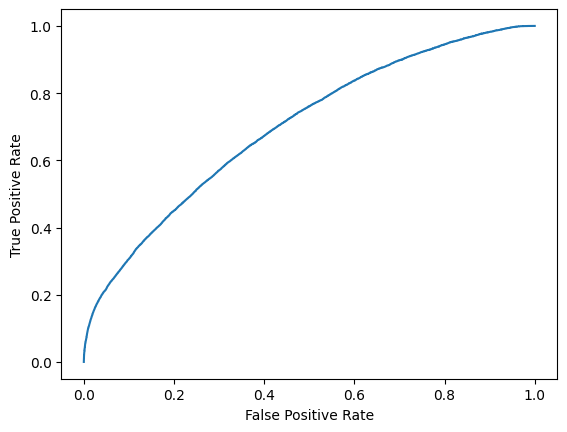

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc 

### На трейне
### Your code is here
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pipe.predict_proba(X_train)[:,1])

RocCurveDisplay(fpr=fpr_train, tpr=tpr_train).plot()

plt.show()

In [48]:
print(f"AUC на трейне/тесте: {auc(fpr_train, tpr_train):.3f}")

AUC на трейне/тесте: 0.699


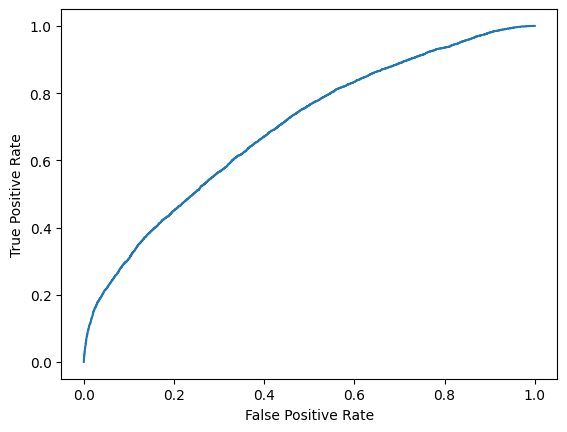

In [44]:
### На тесте
### Your code is here
fpr_test, tpr_test, threshold_test = roc_curve(y_test, pipe.predict_proba(X_test)[:,1])
RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()
plt.show()


In [47]:
print(f"AUC на тесте: {auc(fpr_test, tpr_test):.3f}")

AUC на тесте: 0.697


Постройте PR-кривые на трейне и на тесте. Посчитайте PR-AUC

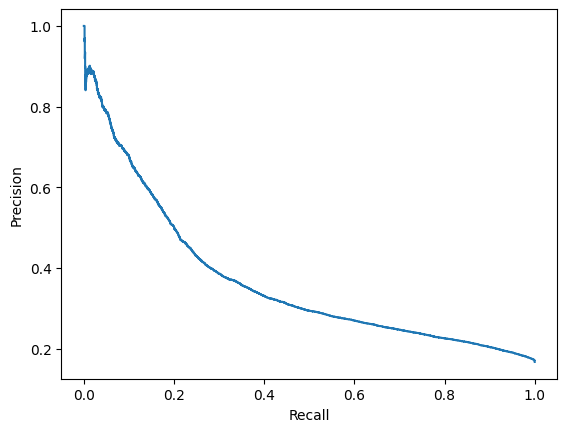

In [49]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve

### На трейне
### Your code is here
precision, recall, threshold = precision_recall_curve(y_train, pipe.predict_log_proba(X_train)[:,1])

PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.show()

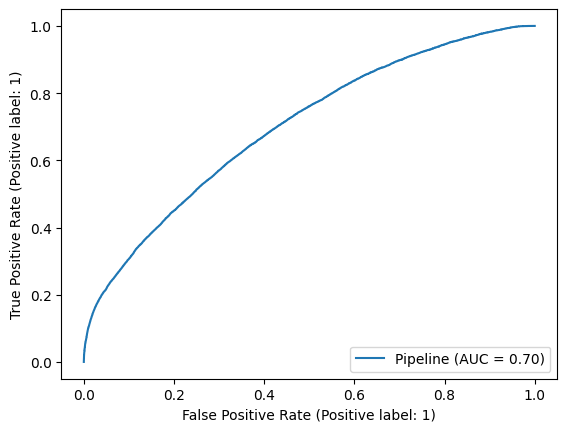

In [50]:
RocCurveDisplay.from_estimator(pipe, X_train,y_train)

In [58]:
print(f"AUC PR-кривой на трейне: {auc(recall, precision):.3f}")

AUC PR-кривой на трейне: 0.366


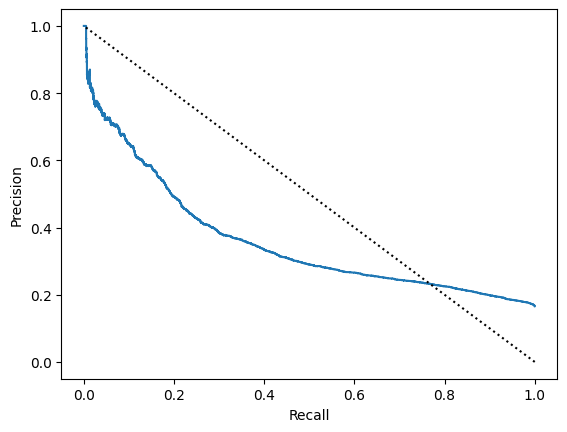

In [64]:
### На тесте
### Your code is here

precision_test, recall_test, threshold_test = precision_recall_curve(y_test, pipe.predict_log_proba(X_test)[:,1])

PrecisionRecallDisplay(precision=precision_test, recall=recall_test).plot()
plt.plot([1, 0], [0, 1], "k:", label="Perfectly calibrated")
plt.show()

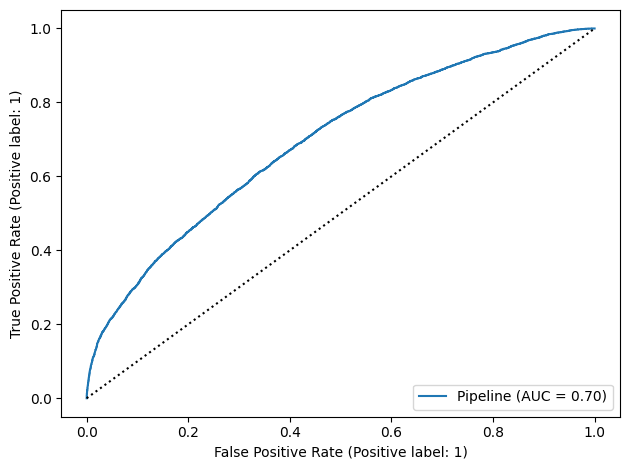

In [65]:
RocCurveDisplay.from_estimator(pipe, X_test,y_test)
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.tight_layout()

In [57]:
print(f"AUC PR-кривой на тесте: {auc(recall_test, precision_test):.3f}")

AUC PR-кривой на тесте: 0.359


Построим калибровочную кривую. Хорошо ли откалиброван обученный классификатор? Сравним с калибровочной кривой для случайного классификатора!

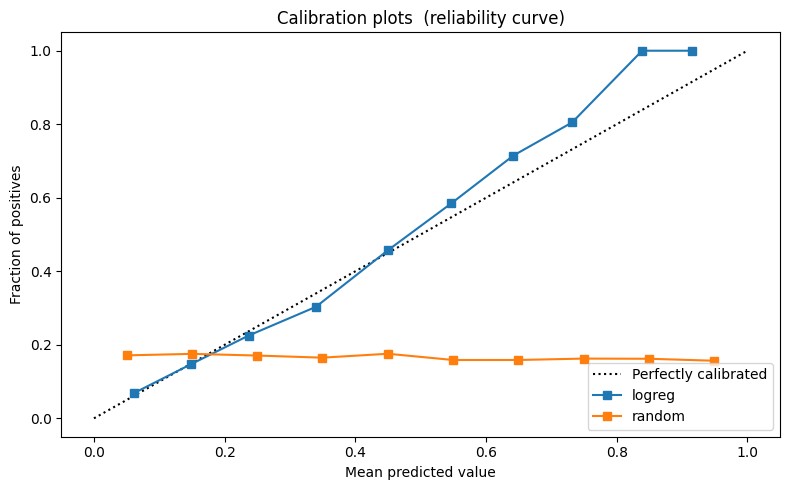

In [59]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

### Предсказания модели на тесте и соответствующая калибровочная кривая
prob_pos = pipe.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="logreg")

### Пусть наши предсказания - случайные, то есть для каждого объекта
### вероятность принадлежности + классу это просто случайное число [0; 1]
prob_pos = np.random.uniform(size=(X_test.shape[0],))
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="random")

plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration plots  (reliability curve)')
plt.tight_layout()

`Модель откалибрована хорошо, калибровочная кривая близка к диагонали`